<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Категоризация" data-toc-modified-id="Категоризация-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Категоризация</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Проверка-статистических-гипотез" data-toc-modified-id="Проверка-статистических-гипотез-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка статистических гипотез</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Описание проекта

**Цель проекта - выделить портреты клиентов, которые склонны уходить из банка.** 

Перед нами стоят следующие задачи:
- Проанализировать клиентов банка 
- Сформулировать и проверить статистические гипотезы



## Обзор данных

**Импортируем необходимые библиотеки**

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings(action='ignore')
import math as mth

**Загрузим наши данные**

In [63]:
pth1 = '/datasets/bank_dataset.csv'
pth2 = 'bank_dataset.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Something is wrong')

**Выведим на экран наш датасет**

In [64]:
df.head(5)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


**Как видим из названий колонок, есть необходимость привести их к нижнему регистру**

In [65]:
df.rename(columns=(lambda x: x.lower()), inplace=True)

**Проверим изменения**

In [66]:
df.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


**Напишем функцию для вывода информации о датасете**

In [67]:
def main_inf(df):
    print('Общая информация о датафрейме', '\n')
    display(df.info())
    print('\n')
    print('Размер датафрейма', '\n')
    display(df.shape)
    print('\n')
    print('Количество пропусков в %', '\n')
    display(df.isna().sum() / 100)
    print('\n')
    print('Количество дубликатов', '\n')
    display(df.duplicated().sum())
    print('\n')
    # print('Описательную статистика', '\n')
    # display(round(df.describe(), 2))

**Применим функцию**

In [68]:
main_inf(df)

Общая информация о датафрейме 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   creditcard        10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


None



Размер датафрейма 



(10000, 12)



Количество пропусков в % 



userid               0.00
score                0.00
city                 0.00
gender               0.00
age                  0.00
objects              0.00
balance             36.17
products             0.00
creditcard           0.00
loyalty              0.00
estimated_salary     0.00
churn                0.00
dtype: float64



Количество дубликатов 



0

**Как видим, в данных имеются пропуски.**

**Возможная причина пропусков - непредоставление данных, неполный сбор информации ответственной стороной**

**Проверим категориальные данные на аномалии**

In [69]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(i, '\n')
        print(df[i].unique(), '\n\n')
        

city 

['Ярославль' 'Рыбинск' 'Ростов Великий'] 


gender 

['Ж' 'М'] 




**Рассмотрим на распределение количественных признаков**

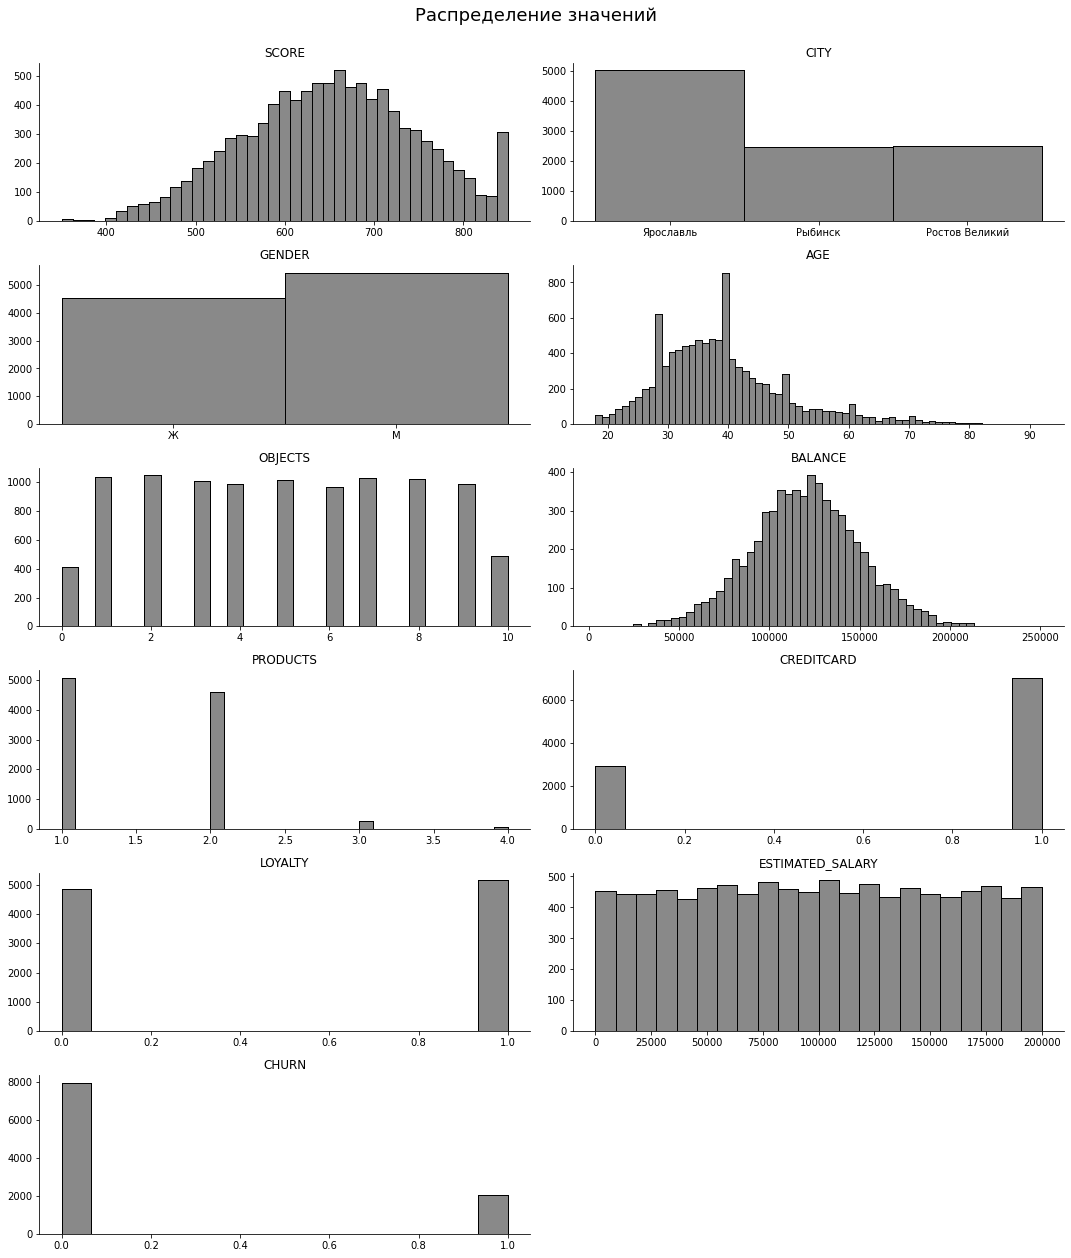

In [70]:
col_count, row_count = 2,7
plt.figure(figsize = (15,20))

for i, j in enumerate(df.drop(['userid'], axis=1).columns):
    for churn in df.columns.drop('userid'):
        try:
            
            current = df
            sns.histplot(current[j], bins='auto',
                       alpha=0.2, color='grey',  ax = plt.subplot(row_count, col_count, i+1)).set_title(j.upper())
            plt.xlabel(None)
            plt.ylabel(None)
        except:
            plt.bar(df[i].unique(), df.groupby(i).count()['userid'], alpha=0.2, color='grey')
            
            plt.grid(visible=None)

sns.despine()    
plt.suptitle('Распределение значений', fontsize= 18, y=1)

plt.tight_layout() 

**Как видим, в наших данных нет каких либо ярко выраженных аномалий. Можно только лишь отметить небольшой пик слева в показателе** *score*


**Проверим есть ли пользователи попавшие в обе группы (отток/не отток)**

In [71]:
df.groupby('userid').agg({'churn':['unique', 'nunique']}).droplevel(0,1).query('nunique > 1')

,unique,nunique
userid,,


**Проверим есть ли пользователи попавшие в данные по нескольким городам**

In [72]:
df.groupby('userid').agg({'city':['unique', 'nunique']}).droplevel(0,1).query('nunique > 1')

,unique,nunique
userid,,


## Предобработка данных

**Рассмотрим пропуски в разрезе параметров**

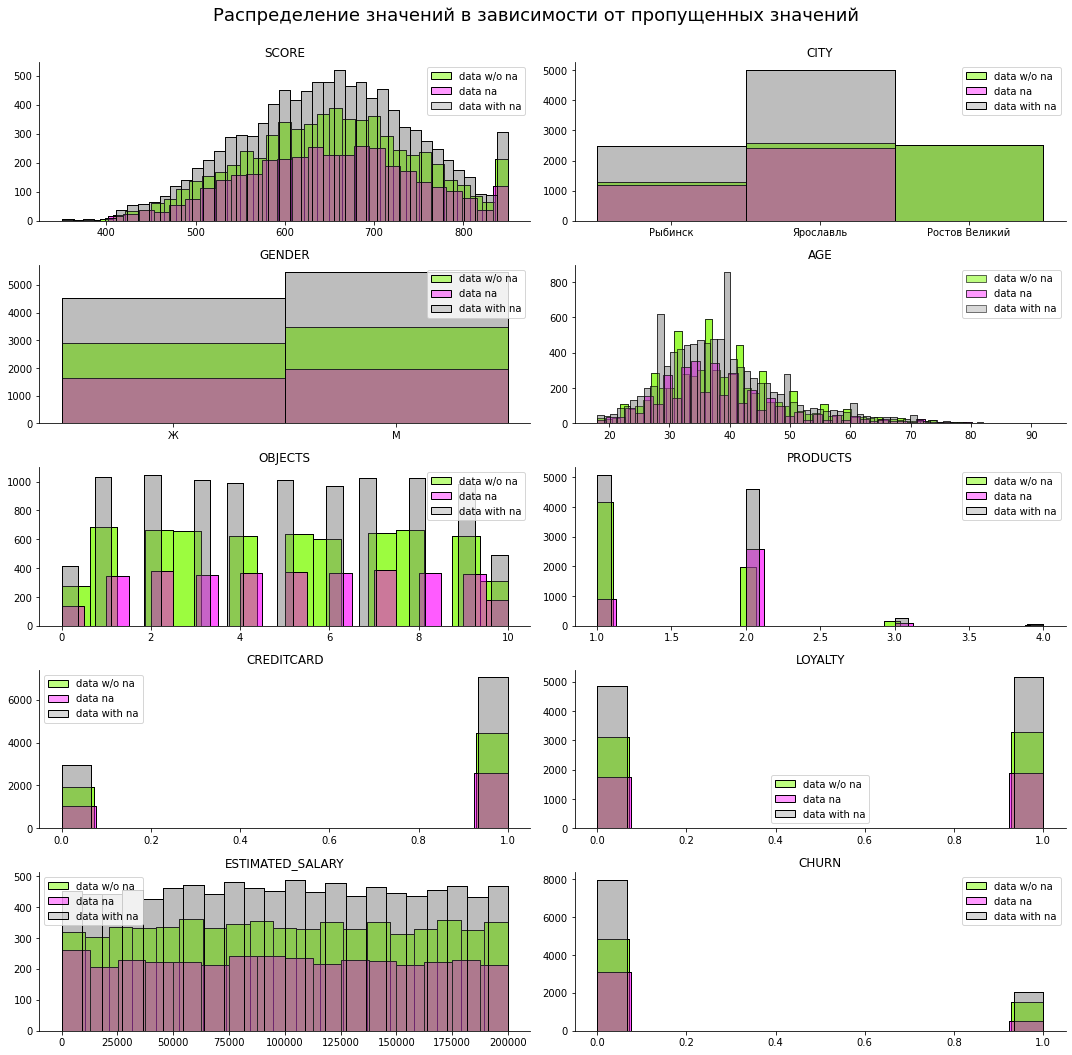

In [73]:
col_count, row_count = 2,7
plt.figure(figsize = (15,20))

for i, j in enumerate(df.drop(['userid', 'balance'], axis=1).columns):
    for churn in df['churn'].unique():
        try:

            current = df[~df['balance'].isna()]
            sns.histplot(current[j], alpha=0.5, bins='auto', ax = plt.subplot(row_count, col_count, i+1), color = "lawngreen").set_title(j.upper())
            
            current = df[df['balance'].isna()]
            sns.histplot(current[j], alpha=0.4, bins='auto', ax = plt.subplot(row_count, col_count, i+1), color = "magenta").set_title(j.upper())
                        
            current = df
            sns.histplot(current[j], alpha=0.3, bins='auto', ax = plt.subplot(row_count, col_count, i+1), color = "grey").set_title(j.upper())


            plt.legend(labels=['data w/o na', 'data na', 'data with na'])
            plt.ylabel(None)
            plt.xlabel(None)
            

        except:
            plt.bar(df[i].unique(), df.groupby(i).count()['userid'], alpha=0.2, bins=50, color='grey')
            
            plt.grid(visible=None)
    

plt.suptitle('Распределение значений в зависимости от пропущенных значений', fontsize= 18, y=1)
sns.despine()  
plt.tight_layout() 

**В наших данных мы наблюдаем пропущенные значения в признаке** *balance*. **Есть отсутствие пропусков в городе Ростов-Великий. Между Городами Рыбинск и Ярославль распределение пропусков равномерное.** 

**Сравним основные характеристики в показателях с полными данными и данными без пропусков**

In [74]:
# Выводим датафрейм с категориальными показателями gender
desc_gend = df\
                .groupby('gender')\
                .count()[['userid']]\
                .rename(columns={'userid':'gender_full'})\
                .merge(
            df[~df['balance'].isna()]\
                .groupby('gender')\
                .count()[['userid']]\
                .rename(columns={'userid':'gender_w/o_na'}), how='inner', on='gender')\
                .describe().reset_index()

# Выводим датафрейм с категориальными показателями city
desc_city = df\
            .groupby('city')\
            .count()[['userid']]\
            .rename(columns={'userid':'city_full'})\
            .merge(
                    df[~df['balance'].isna()]\
                        .groupby('city')\
                        .count()[['userid']]\
                        .rename(columns={'userid':'city_w/o_na'}), how='inner', on='city')\
                        .describe().reset_index()

# Объединяем датафреймы с категориальными показателями 
desc_g_c = desc_gend.merge(desc_city, on='index')

# Выводим датафрейм с количественными показателями
desc_main = df\
            .iloc[:, 1:]\
            .describe()\
            .reset_index()\
            .merge(
                    df[~df['balance'].isna()]\
                        .iloc[:, 1:]\
                        .describe()\
                        .reset_index(), how='inner', on='index', suffixes=('_full', '_w/o_na'))

# Объединяем датафреймы с категориальными и количественными показателями 
desc_main = desc_main.merge(desc_g_c, on='index', how='inner')
desc_main.T.iloc[:, 1:].rename(columns=desc_main.T.iloc[:, 1:].iloc[0])[1:]

,mean,std,min,25%,50%,75%,max
score_full,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
age_full,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
objects_full,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
balance_full,119827.493793,30095.056462,3768.69,100181.975,119839.69,139512.29,250898.09
products_full,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0
creditcard_full,0.7055,0.45584,0.0,0.0,1.0,1.0,1.0
loyalty_full,0.5151,0.499797,0.0,0.0,1.0,1.0,1.0
estimated_salary_full,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
churn_full,0.2037,0.402769,0.0,0.0,0.0,0.0,1.0
score_w/o_na,651.138493,96.934609,350.0,584.0,652.0,718.0,850.0


**В случае удаления увеличится доля города Ростов-Великий**
**Значительная разница в стандартном отклонениее в показателях** *city и gender*

**balance** — количественная переменная. Пропуски в таких переменных заполняют характерными значениями. Это значения, характеризующие состояние выборки, — набора данных, выбранных для проведения исследования. Чтобы примерно оценить типичные значения выборки, выберим медиану.

**Однако заполнение медианой/средним значением приведет к тому что изменится стандартное отклонение и произойдет искажение распределения переменной**


**Рассмотрим распределение значений по городам. Сравним данные с пропусками в городах Ярославль и рыбинск со значениями в Ростове**

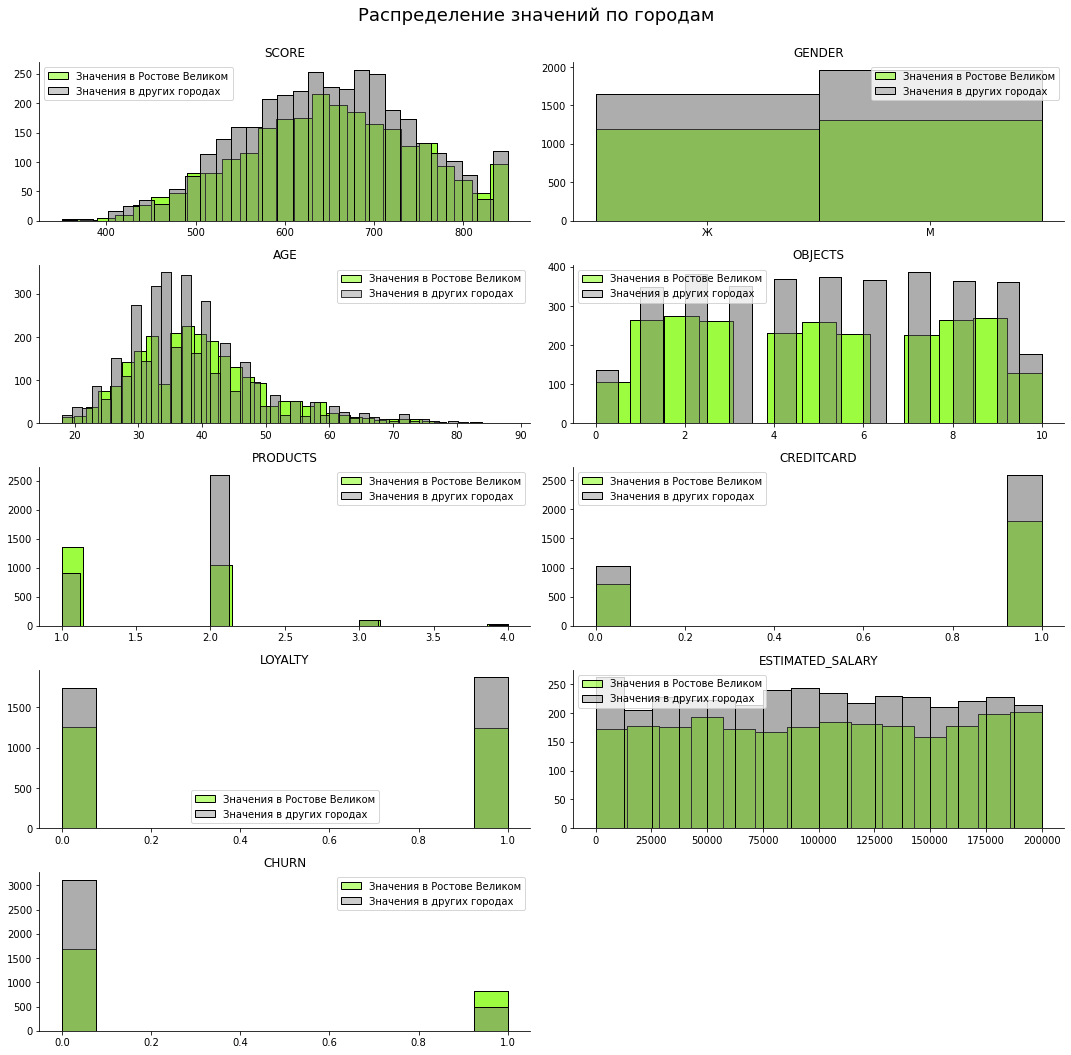

In [75]:
col_count, row_count = 2,7
plt.figure(figsize = (15,20))

for i, j in enumerate(df.drop(['userid', 'city', 'balance'], axis=1).columns):
    for churn in df['churn'].unique():
        try:

            current = df.query('city == "Ростов Великий"')
            sns.histplot(current[j], alpha=0.5, bins='auto', ax = plt.subplot(row_count, col_count, i+1), color = "lawngreen").set_title(j.upper())
            
            current = df[df['balance'].isna()].query('city != "Ростов Великий"')
            sns.histplot(current[j], alpha=0.4, bins='auto', ax = plt.subplot(row_count, col_count, i+1), color = "grey").set_title(j.upper())
                        
      
            plt.legend(labels=['Значения в Ростове Великом', 'Значения в других городах'])
            plt.ylabel(None)
            plt.xlabel(None)
            

        except:
            plt.bar(df[i].unique(), df.groupby(i).count()['userid'], alpha=0.2, color='grey')
            
            plt.grid(visible=None)
    

plt.suptitle('Распределение значений по городам', fontsize= 18, y=1)
sns.despine()  
plt.tight_layout() 

**Как видим есть разница в распределниях по продуктам. Вероятной причиной проущенных значений может быть проблема различии механизмов привлечения клиентов**

**Далее проверим на выбросы количественные показатели**

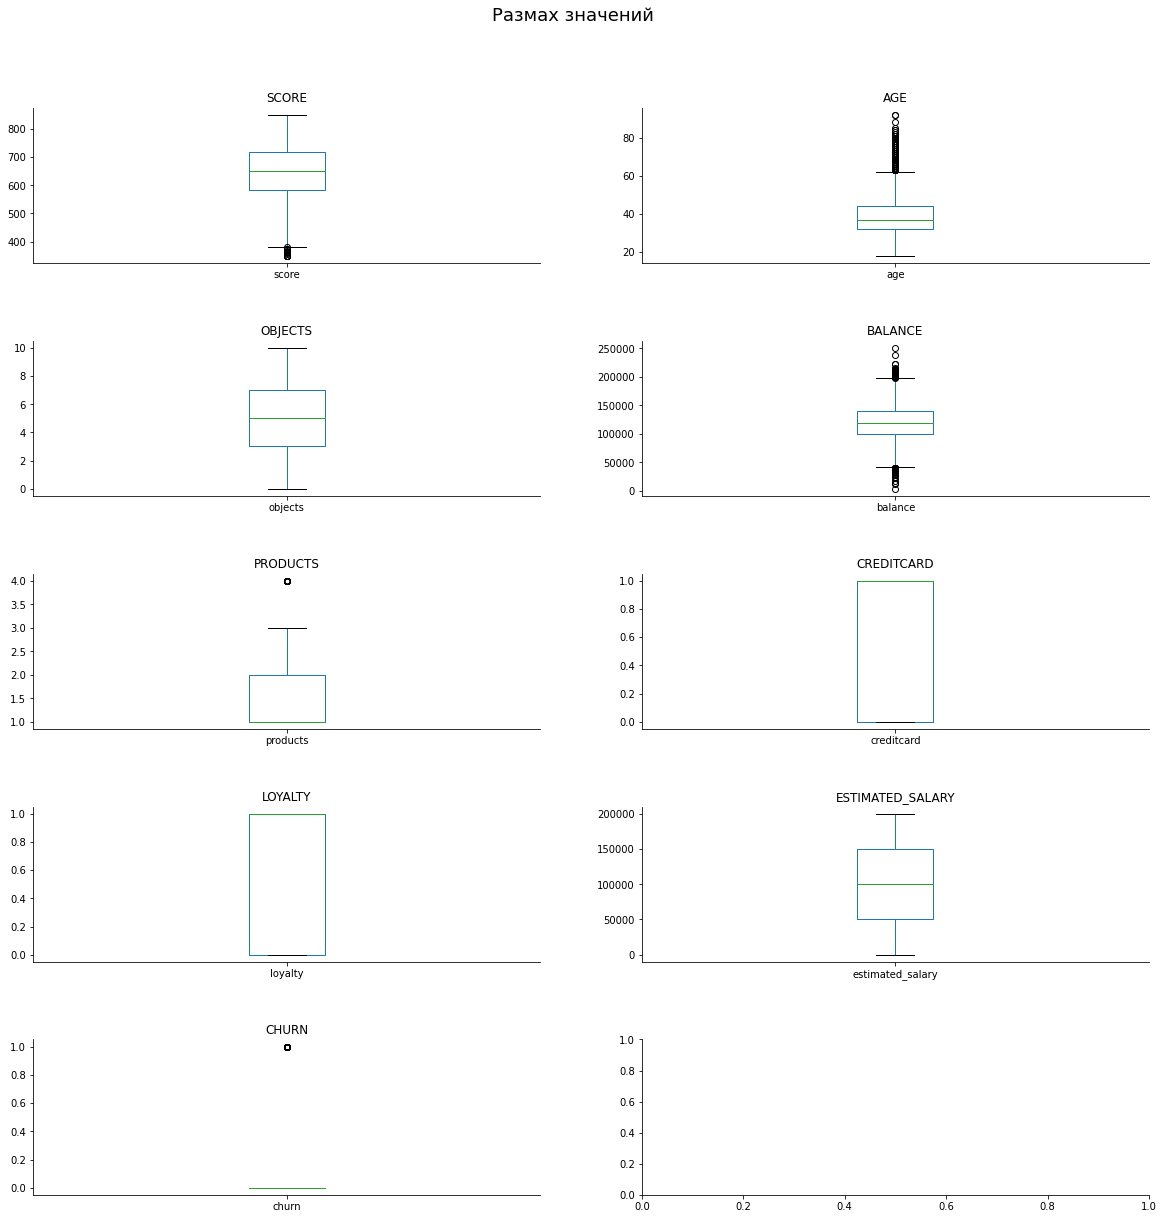

In [76]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Размах значений", fontsize=18, y=0.95)

for i, ax in zip(df[['score', 'age', 'objects','balance','products', 'creditcard', 'loyalty', 'estimated_salary', 'churn']].columns, axs.ravel()):

    df[[i]].boxplot( ax=ax)

    ax.set_title(i.upper())
#     ax.legend(['без выбросов', 'с выбросами'])
    ax.grid(visible=None)
    sns.despine()


plt.show()

**Для того чтобы убрать из датафрейма редкие и выбивающиеся значения сначала создадим список из интересующих колонок**

In [77]:
spisok_wybros = ['score', 'age', 'products','balance']

**Далее передадим список в цикл чтобы создадть два списка с нижними и верхними границами по которым будем делать срез**

In [78]:
spysok_down_plus_wybros = []
spysok_down_minus_wybros = []
for row in spisok_wybros:
    print(row, round(df[row].describe()[4] - (df[row].describe()[-2] - df[row].describe()[4]) * 1.5, 2))
    if round(df[row].describe()[4] - (df[row].describe()[-2] - df[row].describe()[4]) * 1.5, 2) < 0:
        spysok_down_minus_wybros.append(row)
    else:
        spysok_down_plus_wybros.append(row)
print('\n')
# print(spysok_down_minus_wybros)
print(spysok_down_plus_wybros)

score 383.0
age 14.0
products -0.5
balance 41186.5


['score', 'age', 'balance']


In [79]:
spysok_up_plus_wybros = []
spysok_up_minus_wybros = []
for row in spisok_wybros:
    print(row, round((df[row].describe()[-2] - df[row].describe()[4]) * 1.5 + df[row].describe()[-2], 2))
    if round((df[row].describe()[-2] - df[row].describe()[4]) * 1.5 + df[row].describe()[-2], 2) < 0:
        spysok_up_minus_wybros.append(row)
    else:
        spysok_up_plus_wybros.append(row)
print('\n')
# print(spysok_up_minus_wybros)
print(spysok_up_plus_wybros)

score 919.0
age 62.0
products 3.5
balance 198507.76


['score', 'age', 'products', 'balance']


**Создадим датафрейм по срезам с необходимыми значениями**

In [80]:
df_filtered = df[~df.index.isin(df\
                                 .query('balance >= 198507.76')\
                                 .index.append(df\
                                               .query('balance < 41186.5')\
                                               .index).append(df\
                                                              .query('age >= 62')\
                                                              .index).append(df\
                                                                             .query('score <= 383.0')\
                                                                             .index))] 


**Посчитаем процент отброшенных данных**

In [81]:
(df.shape[0] - df_filtered.shape[0]) / df.shape[0] * 100

4.97

**Рассмотрим распределение выбросов**

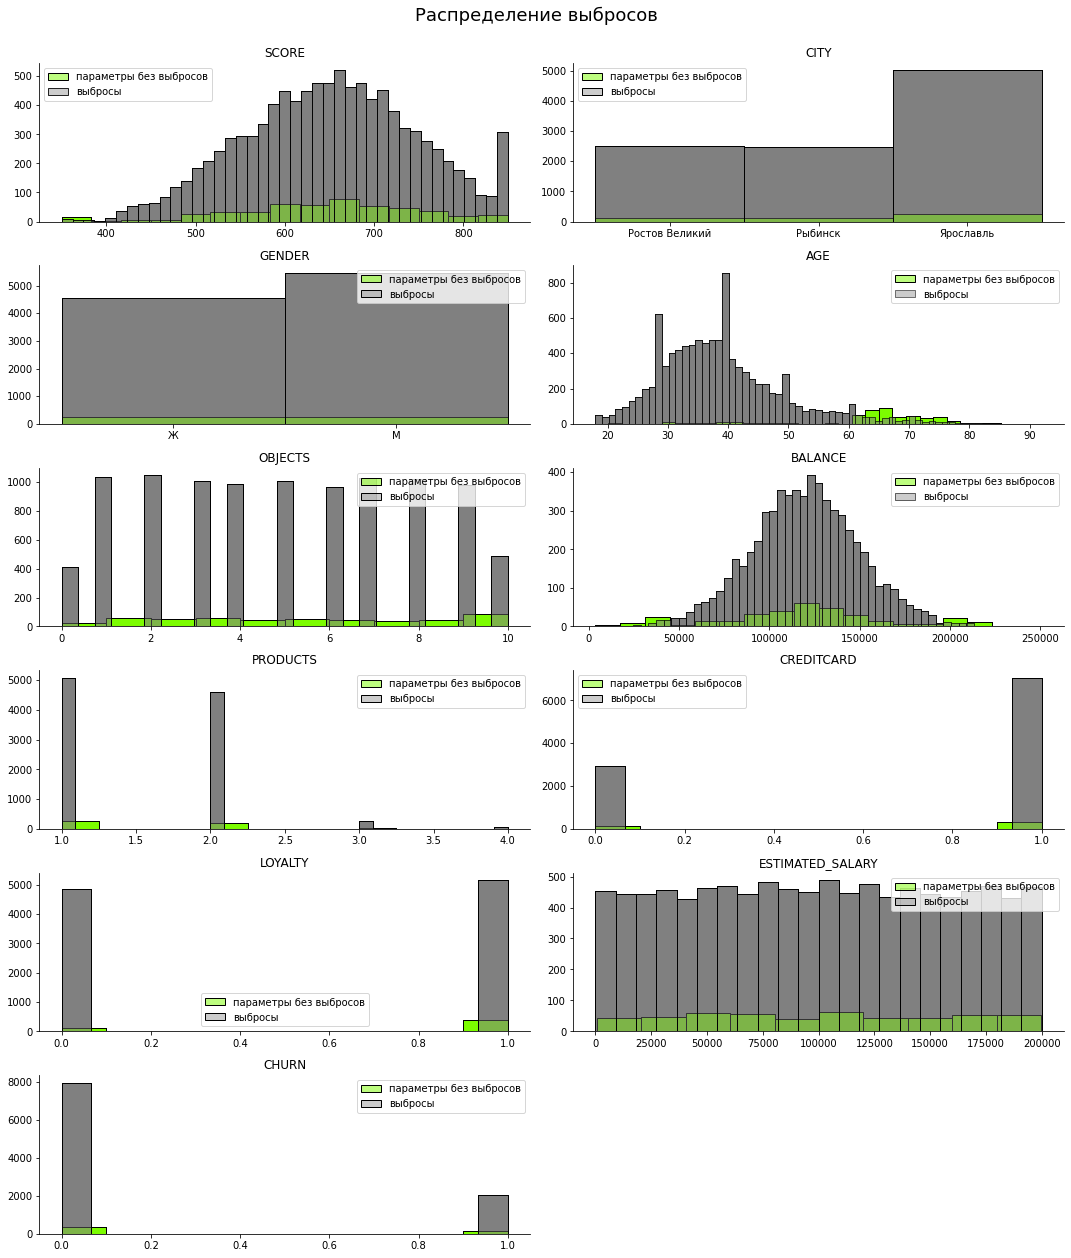

In [82]:
col_count, row_count = 2,7
plt.figure(figsize = (15,20))

for i, j in enumerate(df.drop(['userid'], axis=1).columns):
    for churn in df.columns.drop('userid'):
        try:
            
            current = df[~df.index.isin(df_filtered.index)]
            sns.histplot(current[j], bins='auto',
                       alpha=0.5, color='lawngreen',  ax = plt.subplot(row_count, col_count, i+1)).set_title(j.upper())
            
            current = df
            sns.histplot(current[j], bins='auto',
                        alpha=0.4, color='grey', ax = plt.subplot(row_count, col_count, i+1)).set_title(j.upper())
            
            plt.legend(labels=['параметры без выбросов', 'выбросы'])
            
            plt.xlabel(None)
            plt.ylabel(None)
            
        except:
            plt.bar(df[i].unique(), df[~df.index.isin(df_filtered.index)].groupby(i).count()['userid'], alpha=0.2, color='grey')
            
            plt.grid(visible=None)

sns.despine()    
plt.suptitle('Распределение выбросов', fontsize= 18, y=1)

plt.tight_layout() 

**Как видим, значительную долю выбросов можно наблюдать в показатели** *city - Ростов Великий, products - 1*

Причинами возникновения выбросов может быть сбой в работе оборудования, человеческий фактор, уникальные явления.

**Выведем на экран отфильтрованные данные**

In [83]:
df_filtered.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


**Посмотрим на распределение признаков в сравнении до и после удаления выбросов**

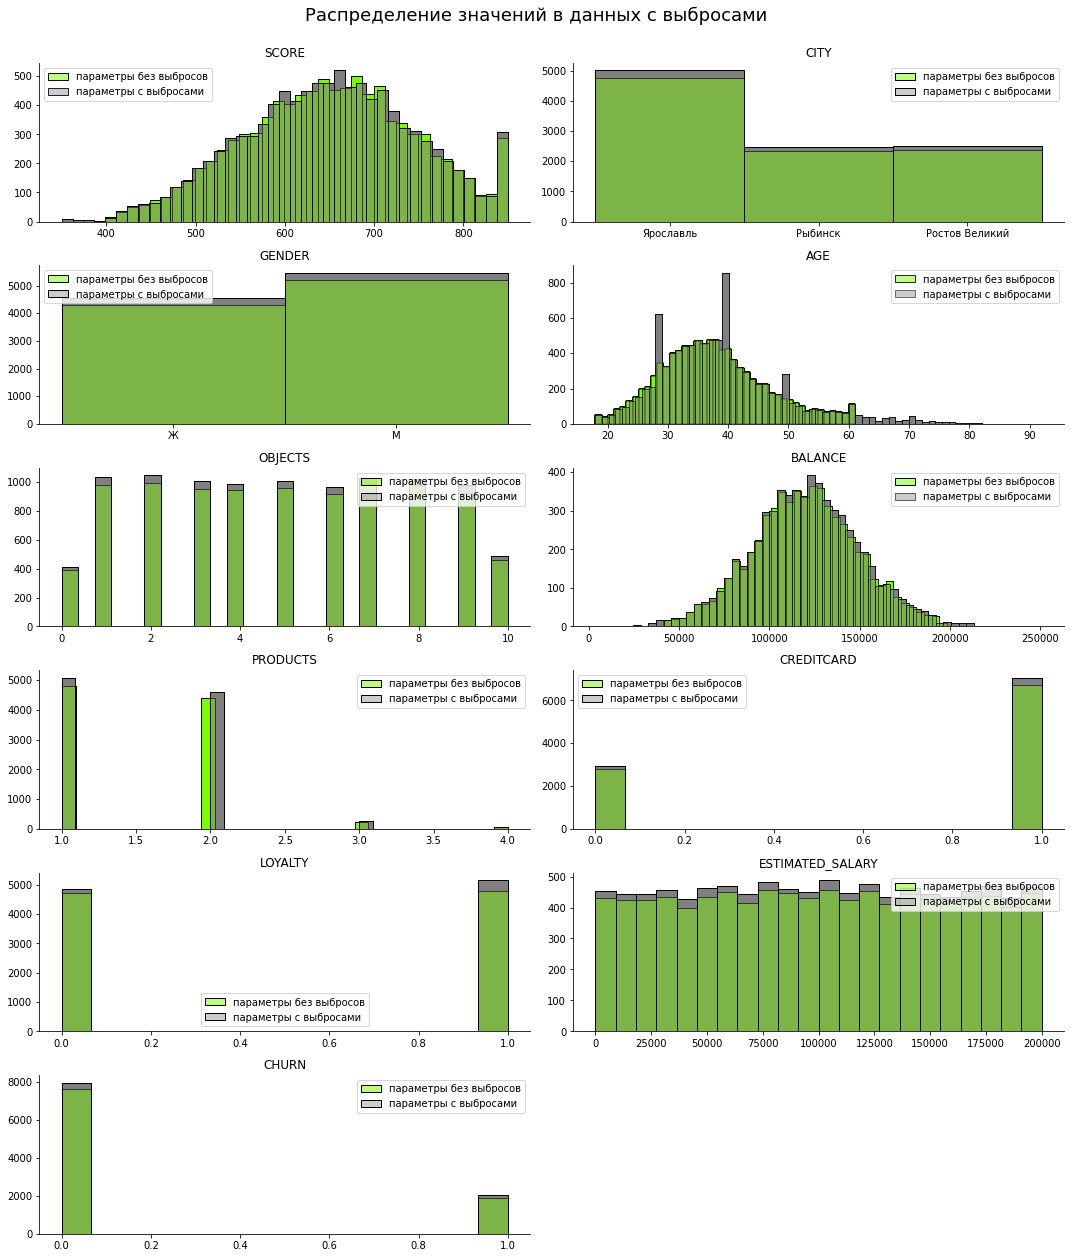

In [84]:
col_count, row_count = 2,7
plt.figure(figsize = (15,20))

for i, j in enumerate(df.drop(['userid'], axis=1).columns):
    for churn in df.columns.drop('userid'):
        try:
            
            current = df_filtered
            sns.histplot(current[j], bins='auto',
                       alpha=0.5, color='lawngreen',  ax = plt.subplot(row_count, col_count, i+1)).set_title(j.upper())
            
            current = df
            sns.histplot(current[j], bins='auto',
                        alpha=0.4, color='grey', ax = plt.subplot(row_count, col_count, i+1)).set_title(j.upper())
            
            plt.legend(labels=['параметры без выбросов', 'параметры с выбросами'])
            
            plt.xlabel(None)
            plt.ylabel(None)
            
        except:
            plt.bar(df[i].unique(), df_filtered.groupby(i).count()['userid'], alpha=0.2, color='grey')
            
            plt.grid(visible=None)

sns.despine()    
plt.suptitle('Распределение значений в данных с выбросами', fontsize= 18, y=1)

plt.tight_layout() 

**Таким образом, сделав срезы по необходимым параметрам мы избавились от выбросов и редких значений**

## Категоризация

**Разбивку на категории будем проводить исходя из их распределения:**
- в категорию **little** попадут первые 25%;
- в категорию **middle** попадут вторые 50%;
- в категорию **a_lot_of** попадут оставшиеся 25%.

**Создадим функции для категоризации**

In [85]:
# Функция категоризации по balance

def category_balance(balance):
    if balance < 95000:
        return 'little'
    if  135000 > balance >= 95000 :
        return 'middle'
    return 'a_lot_of'


# Функция категоризации по salary

def category_salary(salary):
    if salary < 60000:
        return 'little'
    if  130000 > salary >= 60000 :
        return 'middle'
    return 'a_lot_of'


# Функция категоризации по age

def category_age(age):
    if age < 30:
        return 'little'
    if  45 > age >= 30 :
        return 'middle'
    return 'a_lot_of'


# Функция категоризации по age

def category_score(score):
    if score < 584:
        return 'little'
    if  718 > score >= 548 :
        return 'middle'
    return 'a_lot_of'

**Применим функции**

In [86]:
df_filtered['category_balance'] = df_filtered['balance'].apply(category_balance)
df_filtered['category_salary'] = df_filtered['estimated_salary'].apply(category_salary)
df_filtered['category_age'] = df_filtered['age'].apply(category_age)
df_filtered['category_score'] = df_filtered['score'].apply(category_score)

**Проверим**

In [87]:
df_filtered.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,category_balance,category_salary,category_age,category_score
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,a_lot_of,middle,middle,middle
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,little,middle,middle,middle
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,a_lot_of,middle,middle,little
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,a_lot_of,middle,middle,middle
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,middle,middle,middle,a_lot_of


## Исследовательский анализ данных

**Рассмотрим распределения признаков в зависимости от оттока**

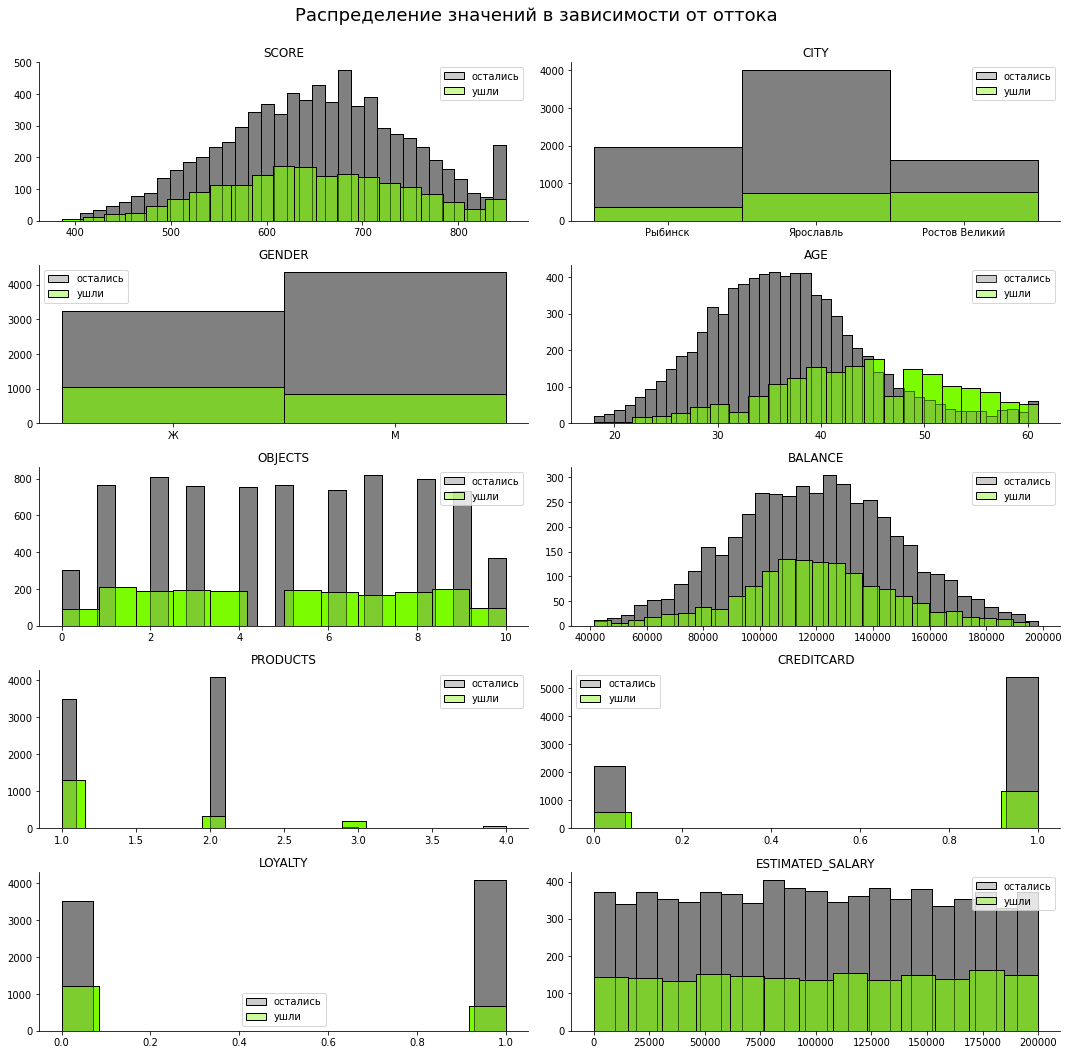

In [88]:
col_count, row_count = 2,7
plt.figure(figsize = (15,20))

for i, j in enumerate(df.drop(['userid', 'churn'], axis=1).columns):
    for churn in df.columns.drop('userid'):
        try:
            
            current = df_filtered.query('(churn ==0)')
            sns.histplot(current[j], bins='auto',
                       alpha=0.4, color='grey',  ax = plt.subplot(row_count, col_count, i+1)).set_title(j.upper())
            
            current = df_filtered.query('(churn ==1)')
            sns.histplot(current[j], bins='auto',
                        alpha=0.4, color='lawngreen', ax = plt.subplot(row_count, col_count, i+1)).set_title(j.upper())
            
            plt.legend(labels=['остались', 'ушли'])
            
            plt.xlabel(None)
            plt.ylabel(None)
            
        except:
            plt.bar(df[i].unique(), df_filtered.query('(churn ==0)').groupby(i).count()['userid'], alpha=0.2, color='grey')
            
            plt.grid(visible=None)

sns.despine()    
plt.suptitle('Распределение значений в зависимости от оттока', fontsize= 18, y=1)

plt.tight_layout() 

*Из графиков можно отметить различия распределений по* **городам, возрасту, количеству используемых продуктов и по активности** *(loyalty)*

**Рассмотрим факторы влияющие на отток. Для этого создадим сначала список исследуемых параметров, а затем пропустих их через цикл, построив графики**

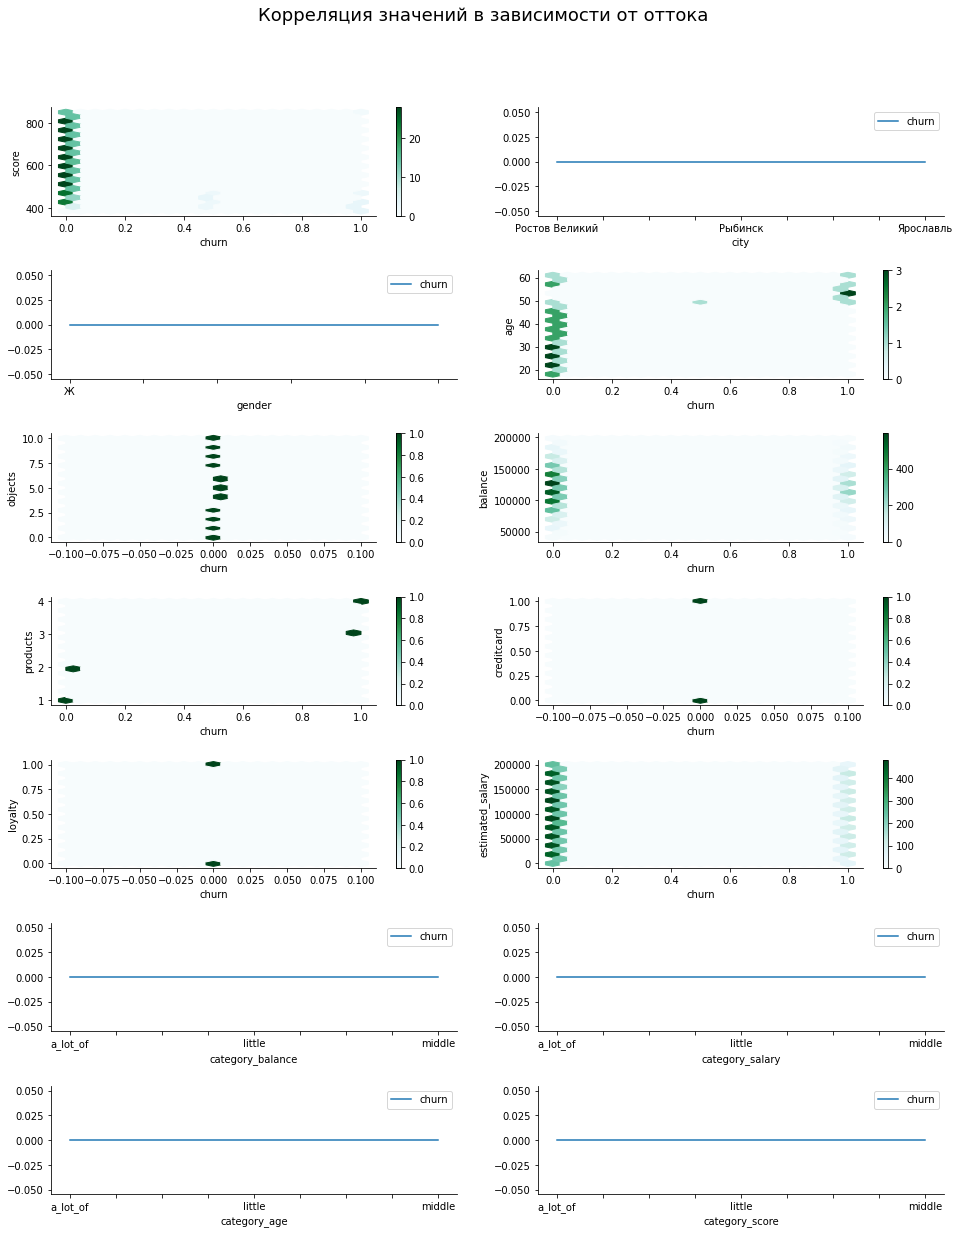

In [89]:
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(16, 20))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Корреляция значений в зависимости от оттока", fontsize=18, y=0.95)

for item, ax in zip(df_filtered.columns[1:].drop(['churn']), axs.ravel()):
    try:
        df_filtered.groupby(item).agg({'churn': 'median'}).reset_index().plot(x='churn', y=item, kind='hexbin', gridsize=20,  sharex=False, grid=True, ax=ax)
#         plt.title(item)
        sns.despine()
        ax.grid(visible=None)
 
    except:
        df_filtered.groupby(item).agg({'churn': 'median'}).plot(ax=ax)
#         plt.title(item)
        sns.despine()
#         ax.grid(visible=None)

    

#     ax.grid(visible=None)
#     sns.despine()


plt.show()

**Каких либо четких взаимосвязей не обнаружено**

**Далее посчитаем корреляцию для показателей**

In [90]:
for i in df_filtered.columns[1:].drop('churn'):
    for j in df_filtered[i].unique():
        kk = round(df_filtered['churn'].corr(df_filtered[i] == j), 3)
        if kk < -0.2 or kk > 0.2:
            print(i, '---', j,  '---', kk)

products --- 3 --- 0.258
products --- 2 --- -0.294
category_age --- a_lot_of --- 0.362


*Наибольшие значения кореляции выдали показатели* **products со значением 3** ***(корреляция 0.258)***, **products со значением 2** ***(корреляция -0.294)*** и **category_age со значением a_lot_of** ***(корреляция 0.362)*** *остальные показатели корреляции близки к нулю, что говорит о том что линейная связь слабая либо у неё более сложный, не линейный характер*

**Далее посчитаем % оттока по каждому показателю**

In [91]:
for i in df_filtered.columns.drop(['userid', 'score', 'churn', 'balance', 'estimated_salary', 'age']):
    svodn = df_filtered\
        .groupby(['churn', i])\
        .agg({'userid':'count'})\
        .rename(columns={'userid': 'кол-во ушедших'})\
        .reset_index()\
            .merge(df_filtered\
                   .groupby([i])\
                   .agg({'userid':'count'})\
                   .rename(columns={'userid': 'общее кол-во'})\
                   .reset_index(), on=i)
    svodn['% ушедших'] = round(svodn['кол-во ушедших'] / svodn['общее кол-во'] * 100, 2)
    print(i)
    display(svodn.query('churn==1').sort_values('% ушедших', ascending=False).iloc[:,1:].reset_index(drop=True))
    print()

city


,city,кол-во ушедших,общее кол-во,% ушедших
0,Ростов Великий,772,2390,32.30
1,Рыбинск,373,2343,15.92
2,Ярославль,750,4770,15.72



gender


,gender,кол-во ушедших,общее кол-во,% ушедших
0,Ж,1058,4308,24.56
1,М,837,5195,16.11



objects


,objects,кол-во ушедших,общее кол-во,% ушедших
0,0,89,390,22.82
1,1,213,979,21.76
2,9,198,929,21.31
3,10,95,462,20.56
4,3,194,953,20.36
5,5,194,961,20.19
6,4,190,943,20.15
7,6,183,920,19.89
8,2,189,996,18.98
9,8,184,983,18.72



products


,products,кол-во ушедших,общее кол-во,% ушедших
0,4,58,58,100.00
1,3,205,247,83.00
2,1,1313,4805,27.33
3,2,319,4393,7.26



creditcard


,creditcard,кол-во ушедших,общее кол-во,% ушедших
0,0,566,2790,20.29
1,1,1329,6713,19.80



loyalty


,loyalty,кол-во ушедших,общее кол-во,% ушедших
0,0,1213,4724,25.68
1,1,682,4779,14.27



category_balance


,category_balance,кол-во ушедших,общее кол-во,% ушедших
0,middle,798,3107,25.68
1,little,227,1147,19.79
2,a_lot_of,870,5249,16.57



category_salary


,category_salary,кол-во ушедших,общее кол-во,% ушедших
0,a_lot_of,683,3304,20.67
1,little,551,2813,19.59
2,middle,661,3386,19.52



category_age


,category_age,кол-во ушедших,общее кол-во,% ушедших
0,a_lot_of,931,1909,48.77
1,middle,846,5965,14.18
2,little,118,1629,7.24



category_score


,category_score,кол-во ушедших,общее кол-во,% ушедших
0,little,497,2367,21.00
1,a_lot_of,475,2376,19.99
2,middle,923,4760,19.39


**Рассчитав процент оттока по каждому показателю можно выделить следующие моменты:**

- в Ростове Великом отток клиентов составляет 1/3;
- женщины (примерно 1/4 от общего числа клиентов);
- количество продуктов, которыми пользуется клиент 3 или 4 (это максимальный показатель из наших данных);
- средний баланс счете (1/4 от общего числа клиентов)
- неактивный клиент (показатель loyalty равен 0);
- старшая возрастная группа.

Таким образом, суммирую выше произведенные расчеты можно сказать, что в портрете клиентов склонных к оттоку можно отнести следующие черты:
- высокие показатели используемых продуктов банка;
- старшая возрастная группа (от 45).

## Проверка статистических гипотез

Проверим гипотезу о том различаются ли доходы клиентов, которые ушли и тех, которые остались:

    H0 - среднии доходы оставшихся клиентов и ушедших одинаковы
    H1 - среднии доходы оставшихся клиентов и ушедших отличаются

    Уровень значимости:  α=0.05

**Так как наши выборки независимы, то использовать будем метод** *st.ttest_ind* **для проверки двусторонней гипотезы**

In [92]:
results = st.ttest_ind(df_filtered.query('churn == 1')['estimated_salary'], 
                       df_filtered.query('churn == 0')['estimated_salary'])
alpha = .05
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.42282120598603146
Не получилось отвергнуть нулевую гипотезу


**Таким образом, не отвергнув нулевую гипотезу можно предположить, что среднии доходы ушедших клиентов и тех кто остался одинаковы**

Проверим гипотезу о том различается ли возраст клиентов, которые ушли и тех, которые остались:

    H0 - средний возраст оставшихся клиентов и ушедших одинаковы
    H1 - средний возраст оставшихся клиентов и ушедших отличаются

    Уровень значимости:  α=0.05

In [93]:
results = st.ttest_ind(df_filtered.query('churn == 1')['age'], 
                       df_filtered.query('churn == 0')['age'])
alpha = .05
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  2.800080891868105e-289
Отвергаем нулевую гипотезу


**Так как нулевую гипотезу мы отвергли, то можно сделать предположение, что возраст клиентов влияет на отток**

Проверим гипотезу о том различаются ли доли ушедших клиентов которые пользуются разным количеством банковских продуктов:

    H0 - доля ушедших клиентов которые пользуется разным количеством банковских продуктов одинаковы
    H1 - доля ушедших клиентов которые пользуется разным количеством банковских продуктов отличаются

    Уровень значимости:  α=0.05

In [94]:
purchases = np.array([df_filtered.query('products > 2').groupby('churn').count().iloc[1, :1].iloc[0], df_filtered.query('products < 3').groupby('churn').count().iloc[1, :1].iloc[0]])

leads = np.array([df_filtered.query('products > 2').groupby('churn').count().iloc[:, :1].sum()[0], df_filtered.query('products< 3').groupby('churn').count().iloc[:, :1].sum()[0]])

alpha = 0.05  # критический уровень статистической значимости

p1 = purchases[0]/leads[0]

# пропорция успехов во второй группе:
p2 = purchases[1]/leads[1]

# ваш код
p_combined  = (purchases[0] +purchases[1]) / (leads[0] + leads[1])
difference = p1 - p2 
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/leads[0] + 1/leads[1]))
# ваш код
distr = st.norm(0, 1)
# ваш код

p_value = (1 - distr.cdf(abs(z_value))) * 2 # ваш код

print('p-значение: ', p_value)

if p_value < alpha: # ваш код
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    )

p-значение:  0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


**Так как нулевую гипотезу мы отвергли, то можно сделать предположение, что между ушедшими клиентами пользующихся разным количеством банковских продуктов есть значимая разница**

## Выводы

  В результате проведенного исследлования можем сказать следующее:
- в логе есть 10000 наблюдений;
- в данных имеются пропуски (3617);
- в данных имеются выбросы;
- анализ пропущенных значений показал:
   - что в Ростове Великом нет пропущенных значений;
   - распределение значений в данных с пропусками и без пропусков по всем остальным показателям не отличаются;
- произвели чистку данных от выбросов;
- провели категоризацию данных по возрасту, балансу на счёте, заработной плате клиента, баллам кредитного скоринга;


- В результате анализа распределений показателей в зависимости от оттока может отметить различия по городам, возрасту, количеству используемых продуктов и по активности (loyalty);


- По результатам корреляционного анализа наибольшие значения взаимосвязи между оттоком и показателями пришлись на следующее:
    - products           **3**        `0.258`
    - products           **2**       `-0.294`
    - category_age    **a_lot_of**    `0.362`


- Остальные показатели корреляции близки к нулю, что говорит о том что линейная связь слабая либо у неё более сложный, не линейный характер


- В результате анализа оттока по каждому показателю можно отметить следующие моменты:
    - в Ростове Великом отток клиентов составляет 1/3;
    - женщины (примерно 1/4 от общего числа клиентов);
    - средний баланс счете (1/4 от общего числа клиентов)
    - количество продуктов, которыми пользуется клиент 3 или 4 (это максимальный показатель из наших данных);
    - неактивный клиент (показатель loyalty равен 0);
    - старшая возрастная группа.


- Учитывая корреляционный анализ и анализ распределений можно сказать, что в портрете клиентов склонных к оттоку можно отнести следующие черты:
    - высокие показатели используемых продуктов банка;
    - старшая возрастная группа (от 45).


Также в исследовании были проверены статистические гипотезы:
- 1) Гипотеза различия дохода между теми клиентами, которые ушли и теми, которые остались. Разница не оказалась значимой.
- 2) Гипотеза о различии возраста клиентов, которые ушли и тех, которые остались. Разница оказалась значимой.
- 3) Гипотеза о различии долей ушедших клиентов пользующихся разным количеством банковских продуктов. 
- При проверке статистических гипотез мы использовали уровень значимости равный 0,05



Таким образом, в целях снижения оттока клиентов можно предложить следующие шаги:
- проработать качественно существующие продукты (изменения в сторону упрощения получения и использования услуг);
- разработать (изменить существующую) систему лояльности для активных клиентов:
    - возможные изменения условий на существующие продукты;
    - повышение ставки вклада;
    - предложение новых/дополнительных услуг.
- проработать систему консультаций/коммуникации для людей старшего возраста.
